# Exploring Property Data
探索物业数据

Revisit the Property Assessment data. We are looking for some info on home prices - we want to narrow our search to a specific subset of homes.
重新访问物业评估数据。我们正在寻找有关房价的一些信息——我们希望将搜索范围缩小到特定的房屋子集。

Our hypothesis is that over time, prices in Edmonton will rise. If we can invest in a segment of the market that is undervalued, that segment will rise faster as it "catches up" with the rest. We don't know if this hypothesis is true in reality - in the future we could do some predictive modelling to try to test it. We are going with a HIPPO opinion - low valued segments will rise, so that is what we will look for in our data. 
我们的假设是，随着时间的推移，埃德蒙顿的价格将会上涨。如果我们可以投资于被低估的市场部分，该部分将随着其他部分“赶上”而上涨得更快。我们不知道这个假设在现实中是否正确——未来我们可以做一些预测模型来尝试测试它。我们将采用 HIPPO 的观点——低价值的细分市场将会上升，这就是我们将在我们的数据中寻找的。

We also are smaller investors. We don't have the up front cash to purchase big money properties and "swing for the fences", we would very much prefer to target properties that are relatively less expensive, to allow us to purchase more and diversify the risk. 
我们也是较小的投资者。我们没有预付现金购买大笔房产和“摇摆不定”，我们更愿意瞄准价格相对较低的房产，以便我们购买更多并分散风险。

So, our goal is to identify which segments of real estate have values that are suitable for investment, based on our assumptions.  
(Note: There are differnt potential answers - I find a set of homes that may look good based on our criteria, there's probably others, it is not a yes/no answer)
因此，我们的目标是根据我们的假设确定哪些房地产细分市场具有适合投资的价值。
（注意：有不同的潜在答案——根据我们的标准，我找到了一组看起来不错的房子，可能还有其他的，这不是一个是/否的答案）

<b>
Use: Attempt to break down and examine the data to find some property groups that appear to be solid investments, supported by the data you have. You can follow my example, or go your own way. There's probably many potential groups that make sense. The solution version has everything I did. Feel free to add more code blocks. I chopped them down so there are not a tonne of empty ones. As well, the exploration is somewhat open ended. If you want to closely follow along my steps, that's fine. You could do things differently, or in a somewhat different order, and that would be all good too. If you feel very comfortable doing things on your own, it is "better" practice to follow less closely. </b>
<b>
使用：尝试分解并检查数据，以找到一些似乎是可靠投资的房地产组，并由您拥有的数据支持。你可以按照我的例子，或者走你自己的路。可能有很多潜在的群体是有意义的。解决方案版本拥有我所做的一切。随意添加更多代码块。我把它们切碎了，所以没有一吨空的。同样，探索是有点开放式的。如果你想紧跟我的脚步，那很好。你可以用不同的方式做事，或者以不同的顺序做事，那也很好。如果您觉得自己做事很自在，那么“更好”的做法是不那么密切地跟随。 </b>

In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

#These 3 things allow for some prettier graphs, using a different visualization package - seaborn.
#This isn't required, we'll start using this a little bit as we go. Seaborn's big selling point
#is that it allows us to create many common graphs, that are very nice, relatively easily
#The third line just makes the default plot size larger, you can change the numbers if you want. 
#这 3 件事允许一些更漂亮的图表，使用不同的可视化包 - seaborn。
#这不是必需的，我们将开始使用它。 Seaborn的一大卖点
#是它允许我们创建许多常用的图形，非常好，相对容易
#第三行只是让默认的绘图尺寸变大，你可以根据需要更改数字
import matplotlib.pyplot as plt   # matplotlib是Python语言及其数值计算库NumPy的绘图库。
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,5)

#### Fancy Graphing - Seaborn
#### 花式图形 - Seaborn

Example of a seaborn distpolot - a histogram with a PDF overlayed on it. I use it in the solution.
In this example, the data is the first argument, the other two arguments are sets of "customizations" for the histogram and PDF (KDE) part.
seaborn distpolot 的示例 - 上面覆盖有 PDF 的直方图。我在解决方案中使用它。
在此示例中，数据是第一个参数，其他两个参数是直方图和 PDF (KDE) 部分的“自定义”集。

You can use this, if you want, just change the data, and the labels and it should be usable for everything here.
There are more options and examples detailed here: https://seaborn.pydata.org/generated/seaborn.distplot.html
如果需要，您可以使用它，只需更改数据和标签，它应该可用于此处的所有内容。
此处详细介绍了更多选项和示例：https://seaborn.pydata.org/generated/seaborn.distplot.html

Generally, it doesn't really matter what tool you use to create visualizations. The thinkstats/thinkplot stuff fits in nicely with what is in the book and is pretty useful and easy to use. Later on, into the machine learning stuff we'll do all of our charting and plotting with Seaborn (or at least I will, you can use something else if you're adventerous), for now it is your choice unless specified. 
通常，使用什么工具来创建可视化并不重要。 thinkstats/thinkplot 的内容与书中的内容非常吻合，非常有用且易于使用。稍后，在机器学习方面，我们将使用 Seaborn 完成所有图表和绘图（或者至少我会，如果你喜欢冒险的话，你可以使用其他东西），现在除非另有说明，否则它是你的选择。

In [2]:
#sns.distplot(dtGlen["Assessed Value"], hist_kws={"label":"Condos"}, kde_kws={"label":"Condo PDF"},)
#sns.distplot(glen["Assessed Value"], hist_kws={"label":"Glenora Garage"}, kde_kws={"label":"Glenora Garage PDF"},)
#plt.show()

This function does the same work as the one we made last time - it does 6 graphs all in bulk: Hist, PMF, CDF, PDF, normal and lognormal prob plots. 
这个函数和我们上次做的一样——它批量绘制 6 个图：Hist、PMF、CDF、PDF、正态和对数正态概率图。

One addition is the rnd=0 thing. That's how we can make one of those optional paramaters, if you don't provide anything there, the hist will have no rounding; if you provide a number, the histogram will round to that many digits. 
一个补充是 rnd=0 的事情。这就是我们如何制作这些可选参数之一，如果您不提供任何内容，则 hist 将没有四舍五入；如果您提供一个数字，直方图将四舍五入到那么多数字。

In [3]:
# Graphing Helper Function
# 绘图辅助函数
def bigGraph(df_in, columnName, rnd=0):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data, rnd))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2)
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3)
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4)
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5)
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6)
    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.Pdf(pdf)
    thinkplot.Config()
    return

In [4]:
#Load data - I used the odd varaible name because I want the final name to be "df" after I do any filtering, so it is easier. 
#Load data - 我使用了奇怪的变量名称，因为我希望在进行任何过滤后最终名称为“df”，这样更容易。
df_init = pd.read_csv("data/Assessments.csv")
df_init.head()

,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude
0,1066158,NaN,14904.0,167 AVENUE NW,N,NaN,NaN,NaN,86000,53.630497,-113.580474
1,10508233,NaN,16340.0,MARK MESSIER TRAIL NW,N,NaN,NaN,NaN,45000,53.617335,-113.605690
2,1194398,NaN,15617.0,83 STREET NW,N,2050.0,BELLE RIVE,Ward 3,285000,53.617007,-113.467976
3,1034214,NaN,10661.0,161 AVENUE NW,Y,3040.0,BEAUMARIS,Ward 3,635000,53.619978,-113.506990
4,1114701,NaN,15003.0,76 AVENUE NW,Y,4430.0,RIO TERRACE,Ward 5,407500,53.508644,-113.579897


<AxesSubplot:xlabel='Assessed Value', ylabel='Count'>

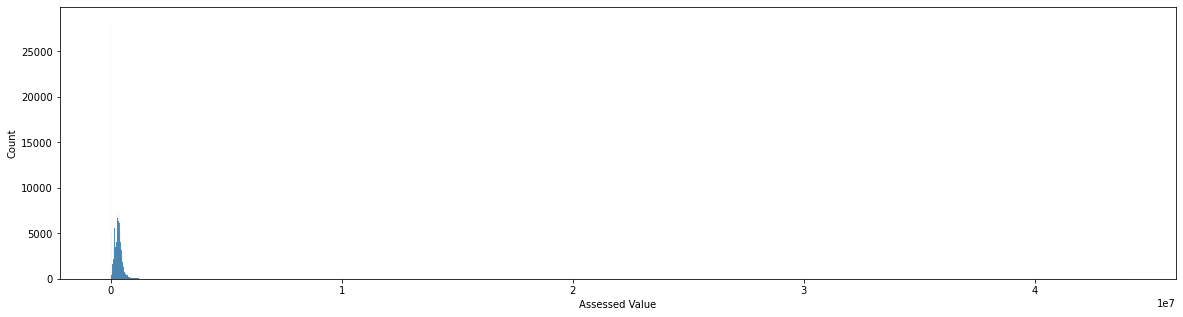

In [5]:
sns.histplot(df_init["Assessed Value"])

In [6]:
temp_hist = thinkstats2.Hist

## START HERE!

We can look at our data, and try to figure out a strategy to stack that paper. 

＃＃ 从这里开始！

我们可以查看我们的数据，并尝试找出一种策略来堆叠那张纸。

### Part 1: Load and Explore Data 
### 第 1 部分：加载和探索数据

Preview data and make sure the data present is what we want/need. 
预览数据并确保呈现的数据是我们想要/需要的。

In [7]:
#Examine the data a little bit to see what we have. #稍微检查一下数据，看看我们有什么。
df_init.head()


,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude
0,1066158,NaN,14904.0,167 AVENUE NW,N,NaN,NaN,NaN,86000,53.630497,-113.580474
1,10508233,NaN,16340.0,MARK MESSIER TRAIL NW,N,NaN,NaN,NaN,45000,53.617335,-113.605690
2,1194398,NaN,15617.0,83 STREET NW,N,2050.0,BELLE RIVE,Ward 3,285000,53.617007,-113.467976
3,1034214,NaN,10661.0,161 AVENUE NW,Y,3040.0,BEAUMARIS,Ward 3,635000,53.619978,-113.506990
4,1114701,NaN,15003.0,76 AVENUE NW,Y,4430.0,RIO TERRACE,Ward 5,407500,53.508644,-113.579897


In [8]:
# I like the .T view better
df_init.describe().T

,count,mean,std,min,25%,50%,75%,max
Account Number,384217.0,7.813424e+06,3.232763e+06,1.001163e+06,4.584405e+06,9.966988e+06,1.017294e+07,1.101388e+07
House Number,342008.0,7.663119e+03,5.439437e+03,1.000000e+00,2.504000e+03,7.916000e+03,1.142500e+04,5.117500e+04
Neighbourhood ID,384213.0,4.270034e+03,1.748173e+03,1.010000e+03,2.660000e+03,4.540000e+03,5.576000e+03,8.888000e+03
Assessed Value,384217.0,3.084198e+05,2.837778e+05,0.000000e+00,1.700000e+05,3.055000e+05,3.975000e+05,4.391150e+07
Latitude,384217.0,5.351842e+01,6.840256e-02,5.333859e+01,5.345862e+01,5.351981e+01,5.357419e+01,5.371515e+01
Longitude,384217.0,-1.135125e+02,8.282889e-02,-1.137129e+02,-1.135691e+02,-1.135105e+02,-1.134477e+02,-1.132784e+02


Assessed Value评估值

#### Fliter Outliers
#### 过滤异常值

We are looking for houses. There's a bunch of data here for houses that are both insanely cheap - near 0, or insanely expensive. We aren't big money investors, so I think the properties over $1mill are not relevant to our examination. 
我们正在寻找房子。这里有一堆数据都非常便宜 - 接近 0 或非常昂贵。我们不是大资金投资者，所以我认为超过 1 百万美元的房产与我们的审查无关。

We don't want that stuff because, for our purposes, it isn't usefull, so we'll remove it - leaving us with only homes that cost a "normal" amount. 
我们不想要那些东西，因为出于我们的目的，它没有用，所以我们将删除它 - 只剩下那些花费“正常”金额的房屋。

In [9]:
#Filter out houses that are out of the range that we care about.#过滤掉超出我们关心范围的房屋。
#I used under $50k or over $1mill - this decision is largely arbitrary, based on what we are actually (pretending) to use this data for.
#我使用的金额低于 5 万美元或超过 1 美元——这个决定很大程度上是武断的，基于我们实际（假装）使用这些数据的目的。

df = df_init[df_init["Assessed Value"] < 1000000]
df = df[df["Assessed Value"] > 50000] 
df.describe()

,Account Number,House Number,Neighbourhood ID,Assessed Value,Latitude,Longitude
count,3.339850e+05,333750.000000,333982.000000,333985.000000,333985.000000,333985.000000
mean,7.606939e+06,7709.258511,4309.295447,332817.712382,53.519205,-113.510951
std,3.273373e+06,5432.207688,1722.380669,150520.220473,0.069117,0.083632
min,1.001346e+06,1.000000,1010.000000,50500.000000,53.338595,-113.712930
25%,4.232054e+06,2538.000000,2700.000000,227000.000000,53.459043,-113.569350
50%,9.479718e+06,8004.000000,4520.000000,323500.000000,53.519458,-113.508079
75%,1.013107e+07,11439.000000,5590.000000,408500.000000,53.577400,-113.444329
max,1.101388e+07,51175.000000,8888.000000,999500.000000,53.715150,-113.278441


About 50,000 properties removed. Seems reasonable. We can look at the distribution and see what is there...

You could use our original graphing techniques (thinkplot), the bigGraph function above, the seaborn plotting, or a combination of all. 
<br><br><br>
#### Visualize Distributions

大约 50,000 处房产被移除。似乎有道理。我们可以看看分布，看看有什么......

您可以使用我们最初的绘图技术（thinkplot）、上面的 bigGraph 函数、seaborn 绘图或所有这些技术的组合。
<br><br><br>
#### 可视化分布

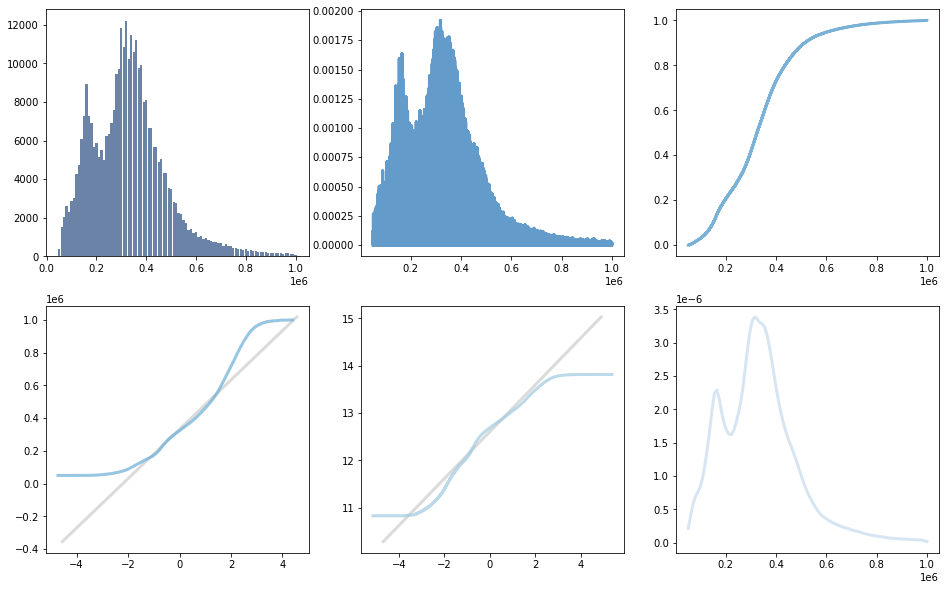

In [10]:
bigGraph(df, "Assessed Value", -4)

<AxesSubplot:xlabel='Assessed Value', ylabel='Count'>

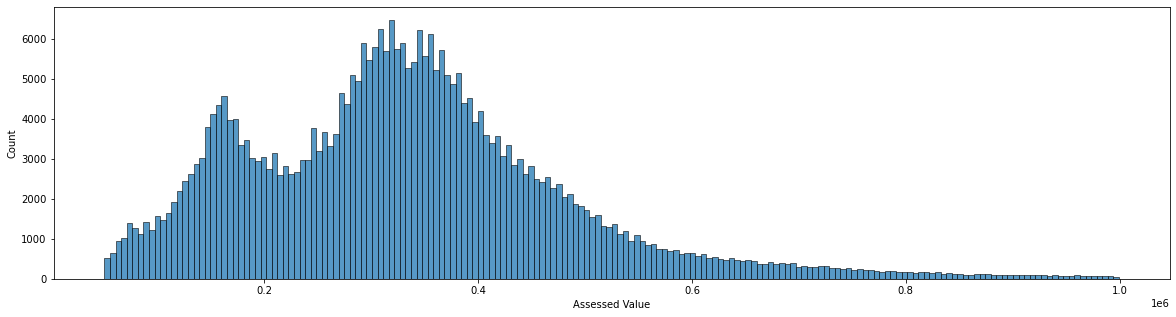

In [11]:
sns.histplot(df, x="Assessed Value")

kde_kws 是 kdeplot(核密度估计图)

e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


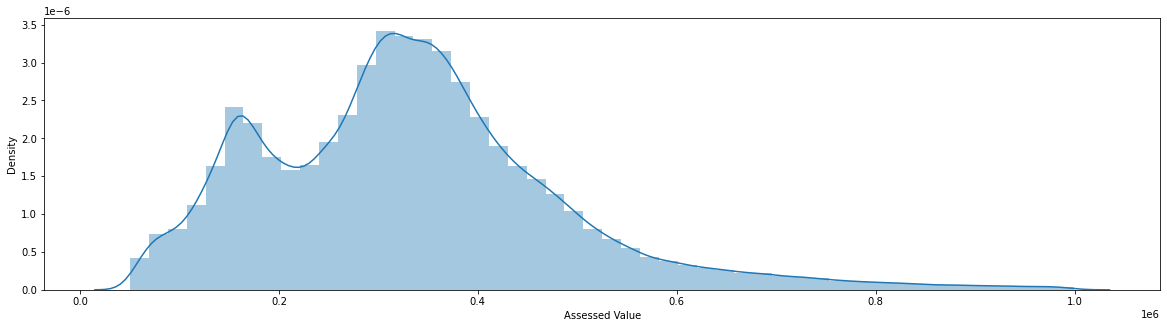

In [12]:
#Create some plots to examine the distribution of the data. #创建一些图来检查数据的分布。
sns.distplot(df["Assessed Value"], kde_kws={"label":"Value"}, hist_kws={"label":"Value"})
plt.show()

We have taken a look at the statistics and the distribution of the data. Can we draw any conclusions from what we've seen here? 
我们已经查看了统计数据和数据的分布情况。我们能从我们在这里看到的东西中得出任何结论吗？

### Part 2: Split Data
### 第 2 部分：拆分数据

Split the data, to look for tendencies by groups. We have several values we can use, I will start with the most simple - garage. 
拆分数据，按组查找趋势。我们有几个可以使用的值，我将从最简单的开始 - 车库。

In [13]:
#Split the data into subsets. I used garage/not for my subsets. #将数据拆分为子集。我使用车库/不用于我的子集。
df_gar = df[df["Garage"] == "Y"]
df_no = df[df["Garage"] == "N"]

e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Assessed Value', ylabel='Density'>

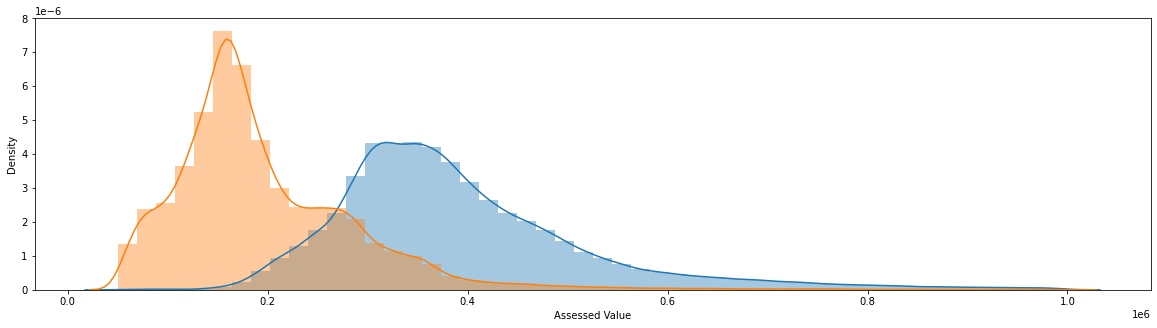

In [14]:
sns.distplot(df_gar["Assessed Value"])
sns.distplot(df_no["Assessed Value"])

e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


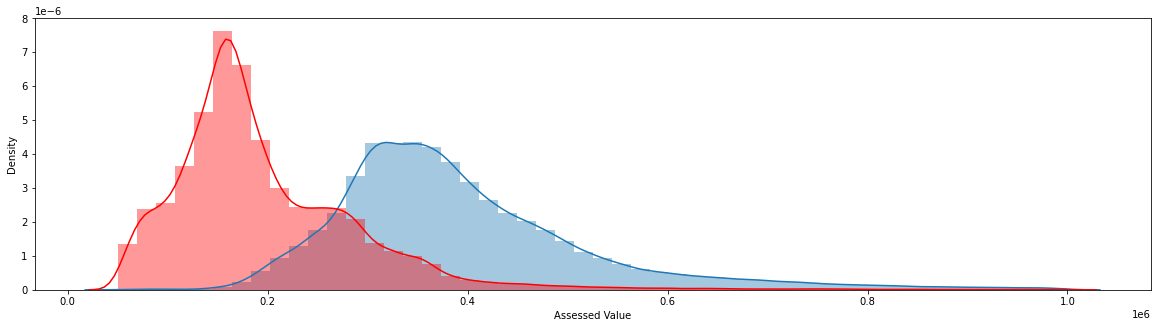

In [15]:
#Plot the subsets to look at their individual distributions. 
#绘制子集以查看它们各自的分布。
sns.distplot(df_gar["Assessed Value"], kde_kws={"label":"Garage PDF"}, hist_kws={"label":"Garage"})
sns.distplot(df_no["Assessed Value"], kde_kws={"label":"No Garage PDF", "color":"red"}, hist_kws={"label":"No Garage", "color":"red"})
plt.show()

We can see that both of our slices of data, once separated, are much closer to a normal distribution. Analyzing these two separately is probably going to be easier than the double bump original distribution. 
I will caclulate a bunch of statistics for each group - including skew, so I can get a measure of how "stretched out" the distribution is. 
我们可以看到，我们的两个数据切片一旦分开，就更接近于正态分布。分别分析这两个可能会比双凸点原始分布更容易。
我将为每个组计算一堆统计数据 - 包括偏斜，因此我可以衡量分布的“延伸”程度。

I will also look at each group and figure out what share of the homes are less than $200k, $350k, and $500k, for my own info - if I want to invest in properties that are "lowish" in value, how many are there?
我还将查看每个组，并根据我自己的信息，找出低于 20 万美元、35 万美元和 50 万美元的房屋份额——如果我想投资价值“低”的房产，有多少在那儿？

### Part 3: Singular Statistics and CDF
奇异统计和 CDF


Skew:偏度

In [16]:
#Example of printing out a bunch of statistics on one line#在一行上打印出一堆统计数据的例子

print("Garage - Mean:", df_gar["Assessed Value"].mean(), "Median:", df_gar["Assessed Value"].median(), "STD:", df_gar["Assessed Value"].std(), "Skew:", thinkstats2.Skewness(df_gar["Assessed Value"]))
print("Non-Garage - Mean:", df_no["Assessed Value"].mean(), "Median:", df_no["Assessed Value"].median(), "STD:", df_no["Assessed Value"].std(), "Skew:", thinkstats2.Skewness(df_no["Assessed Value"]))

Garage - Mean: 392847.61504702194 Median: 366500.0 STD: 129514.19777661306 Skew: 1.4131815384478883
Non-Garage - Mean: 197646.6897088891 Median: 173500.0 STD: 97552.29499596237 Skew: 2.104894051798442


#### CDFs

We can use the CDF functions to figure out some statistics that we saw in the visualization of our data - what share of the data falls under a certain cut-off. 
#### CDF

我们可以使用 CDF 函数来计算我们在数据可视化中看到的一些统计数据 - 数据中有多少份额属于某个截止值。

In [17]:
cd_gar = thinkstats2.Cdf(df_gar["Assessed Value"])
cd_gar.PercentileRank(200000), cd_gar.PercentileRank(400000)

(1.7243541238784996, 62.59258458545022)

In [18]:
cd_no = thinkstats2.Cdf(df_no["Assessed Value"])
cd_no.PercentileRank(200000), cd_no.PercentileRank(400000)

(63.41446791938468, 96.79193846752993)

In [19]:
#Use CDF to figure out how many are under each value cutoff. #使用 CDF 计算每个值截止值下有多少。
cdfn = thinkstats2.Cdf(df_no["Assessed Value"])
cdfn.Prob(150000), cdfn.Prob(200000), cdfn.Prob(250000)

(0.3210592931554863, 0.6341446791938468, 0.7689708889105248)

#### Initial Conclusions
#### 初步结论

What can we make of this? A few things, we aren't entirely sure if they will be important right now.
我们能做些什么呢？有些事情，我们不完全确定它们现在是否重要。

- Non garage houses are about $200k cheaper on average.
- 非车库房屋平均便宜约 20 万美元。

- Non garage houses are more tightly packed (smaller std), more "peaky" (kurtosis), and trail off to the right more (skew). This should kind of make sense logically, there's lots of smaller and cheaper nonm-garage homes, then there are a handful of luxury properties that scatter around the higher values. We can hypothesize that many/most non-garage houses are condos, but we need to check it. Houses over a certain, relatively low, value tend to always have garages so there's less weirdness to the distribution. 
- 非车库房屋更紧凑（std 更小），更“尖峰”（峰度），并且更向右倾斜（倾斜）。这在逻辑上应该是有道理的，有很多更小更便宜的非车库住宅，然后有少数豪宅分散在更高的价值附近。我们可以假设许多/大多数非车库房屋是公寓，但我们需要检查它。超过一定的、相对较低的价值的房子往往总是有车库，所以分布的怪异程度较低。

- There is a comparatively massive cache of non-garage homes that are under $200k, and almost all are under $350k
- 有大量低于 20 万美元的非车库住宅，而且几乎全部低于 35 万美元

#### Condo vs House - Proxy Data

Our dataset doesn't have a direct measure of if a piece of property is a condo or a house. Based on our expert knowledge, this factor probably helps in predicting value. What do we do????

We don't have a condo/house variable in the data, but we can use some other pieces of data as a proxy. This won't be 100% accurate, but it may be usefull enough to help inform our decision making. 
#### Condo vs House - 代理数据

我们的数据集无法直接衡量一处房产是公寓还是房屋。根据我们的专业知识，这个因素可能有助于预测价值。我们做什么？？？？

我们在数据中没有 condo/house 变量，但我们可以使用其他一些数据作为代理。这不会是 100% 准确的，但它可能足以帮助我们做出决策。

In [20]:
df.sample(5)

,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude
336452,10715364,NaN,9812.0,225 STREET NW,Y,4487.0,SECORD,Ward 1,472500,53.537872,-113.703584
315516,10395938,NaN,3813.0,KIDD BAY SW,Y,5576.0,KESWICK AREA,Ward 9,720000,53.420622,-113.644439
180902,9957107,NaN,16308.0,90 STREET NW,Y,2241.0,EAUX CLAIRES,Ward 3,387500,53.625149,-113.480688
245696,10021528,205,630.0,MCALLISTER LOOP SW,N,5452.0,MACEWAN,Ward 9,151000,53.431061,-113.519023
307947,10238271,NaN,8842.0,180A AVENUE NW,Y,2440.0,KLARVATTEN,Ward 3,453000,53.642692,-113.475922


In [21]:
#Use suite values to assess house/condo split. My assumption is that if a home has a Suite number, it is a condo; if it doesn't, it is a house.
#使用套房价值来评估房屋/公寓分割。我的假设是，如果房子有套房号，那就是公寓；如果没有，那就是房子
# #If I calculate that percentage for each group, it could help indicate if my guess is true:
#如果我计算每个组的百分比，它可以帮助表明我的猜测是否正确：
#Example of calculating how many of each set have no suite number. 
#计算每组有多少没有套房号的示例。

print("Garage:", df_gar["Suite"].isnull().sum()/len(df_gar["Suite"]))
print("Non:", df_no["Suite"].isnull().sum()/len(df_no["Suite"]))

Garage: 0.93769322235434
Non: 0.3686398597994353


In [22]:
#Graph the suite/nonsuite groups against eachother. 
#绘制套件/非套件组对彼此。

I think my hypothesis is supported - non garage houses mostly do have a suite number, garage ones mainly don't. This isn't a 100% definitive result, but it is pretty solid. 
我认为我的假设得到了支持——非车库的房子大多有套房号，车库的主要没有。这不是 100% 确定的结果，但它非常可靠。

What can we take from this? Condos are cheaper, houses are more expensive. Garage is an OK-ish proxy for the house/condo split, not at all perfect - I also suspect it is probably a stronger relationship as prices rise, I doubt many expensive houses don't have garages. 
我们能从中得到什么？公寓更便宜，房子更贵。车库是房屋/公寓拆分的一个不错的代表，一点也不完美——我还怀疑随着价格上涨，这可能是一种更牢固的关系，我怀疑许多昂贵的房子没有车库。

As well, perhaps as the city grows and as it becomes more dense and urban, perhaps the value of condos will rise and become closer to homes. We see a pattern of central condos becomming more expensive in most larger cities, a hypothesis that a similar thing will happen here is pretty reasonable. 
同样，也许随着城市的发展，随着城市变得更加密集和城市化，公寓的价值可能会上升并变得更接近家庭。我们看到在大多数大城市中，中央公寓的价格变得越来越贵，一个类似的事情会在这里发生的假设是非常合理的。

NOTE: At this point, we could also/alternatively split the data into suite/non-suite segments, or a 4 way split with both suite and garage. I will continue with garage/non for now. In real life, there's a pretty high probability that we'd come back and also split the data by suite. 
注意：此时，我们还可以/或者将数据拆分为套件/非套件段，或者将数据拆分为套件和车库的 4 路。我现在将继续车库/非。在现实生活中，我们很有可能会回来并按套件拆分数据。

### Part 4: Investigate location. 第 4 部分：调查位置。

To investigate this more, we need to take a look at where these properties are located.... We can see what data we have - Ward, neighborhood, and lat/lon all indicate position. I need to go look at a map to see what is useful. Wards are large, and there are 12 of them. Neigborhoods are small, and there are a lot. We can start with wards and do a crude split for initial investigation. 
为了更深入地研究这一点，我们需要看看这些属性的位置......我们可以看到我们拥有的数据——Ward、neighborhood 和 lat/lon 都表示位置。我需要去看看地图，看看有什么用处。Ward很大，有12个。neighborhood很小，但有很多。我们可以从Ward开始，为初步调查做一个粗略的划分。

Note: We'd probably want to investigate things like square footage at this point in real life. We'll look at that comming up soon - looking at how two variables are related (correlated) to each other. 
注意：我们可能想在现实生活中的这一点上调查诸如平方英尺之类的东西。我们很快就会看到这一点 - 看看两个变量如何相互关联（相关）。

In [23]:
#How many properties are in each ward? 每个ward有多少房源？
df_no["Ward"].value_counts()

Ward 6     19028
Ward 9     10826
Ward 4      9798
Ward 1      8652
Ward 11     8392
Ward 10     8282
Ward 12     8058
Ward 8      6693
Ward 5      6599
Ward 2      6364
Ward 7      5098
Ward 3      4917
Name: Ward, dtype: int64

https://www.cbc.ca/news/canada/edmonton/edmonton-votes-2017-wards-1.4303774 ward of edmonton

On a map, Ward 6 is downtown, it has the most non garage properties, which makes sense. 9 is Riverbend, there's lots of condos in Terwilligar and area. 4 is the far north east, 1 is the north-west, 11 is near south-east, 10 is Calgary Trail and west, 12 is far south east, and 8 is Strathcona and east to the city limit. 
在地图上，Ward 6 在市中心，它拥有最多的非车库物业，这是有道理的。 9 是 Riverbend，在 Terwilligar 和地区有很多公寓。 4 是远东北，1 是西北，11 是东南附近，10 是卡尔加里步道和西部，12 是远东南，8 是斯特拉斯科纳和东部到城市边界。

First try, we can isolate downtown from the surroundings.
第一次尝试，我们可以将市中心与周围环境隔离开来。

Note: I just googled a ward map. The ridings are changing for this current election - this data uses the old ridings, so I made sure I had an old map
注意：我刚刚用谷歌搜索了一张ward地图。当前选举的选区正在发生变化——这些数据使用的是旧选区，所以我确定我有一张旧地图

In [24]:
#Create new dataframe for Ward 6, and everything else from the non-garage set of homes.
#为病房 6 以及非车库家庭中的所有其他内容创建新的数据框。
dt = df_no[df_no["Ward"] == "Ward 6"]
burb = df_no[df_no["Ward"] != "Ward 6"]
dt.head()

,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude
10,1286483,910,10145.0,121 STREET NW,N,1150.0,OLIVER,Ward 6,120500,53.542162,-113.530183
18,1213032,1701,11826.0,100 AVENUE NW,N,1150.0,OLIVER,Ward 6,808500,53.539950,-113.526293
72,1286657,909,10145.0,121 STREET NW,N,1150.0,OLIVER,Ward 6,146000,53.542162,-113.530183
90,1030782,40,10160.0,119 STREET NW,N,1150.0,OLIVER,Ward 6,191000,53.542264,-113.527347
97,1244110,103,10917.0,109 STREET NW,N,1030.0,CENTRAL MCDOUGALL,Ward 6,86500,53.555105,-113.507884


pdf 概率密度

e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


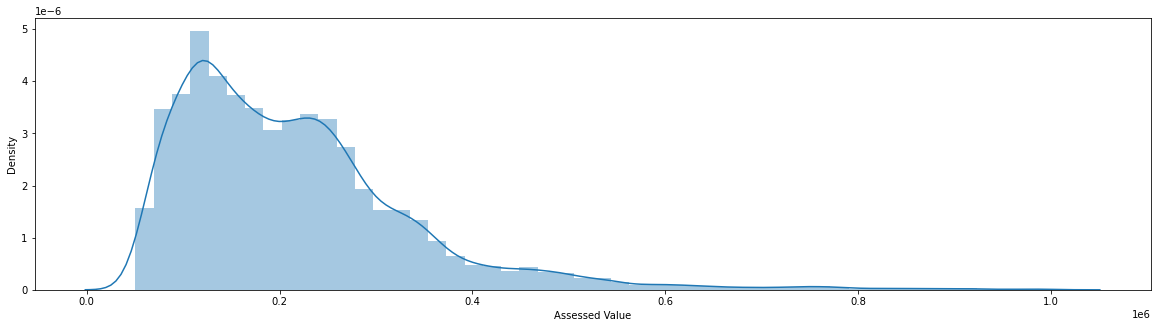

In [25]:
#Plot the new groupings. 
#绘制新的分组。
sns.distplot(dt["Assessed Value"], hist_kws={"label":"Downtown"}, kde_kws={"label":"DT PDF"},)
#sns.distplot(burb["Assessed Value"], hist_kws={"label":"Surrounding"}, kde_kws={"label":"Burbs PDF"},)
plt.show()

e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histo

<AxesSubplot:xlabel='Assessed Value', ylabel='Density'>

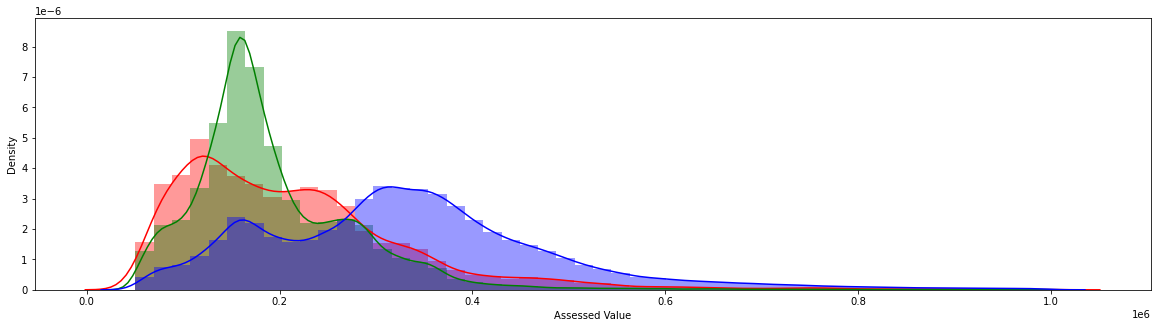

In [26]:
sns.distplot(dt["Assessed Value"],label="Downtown",color='red')
sns.distplot(burb["Assessed Value"],label="Surrounding",color='green')
sns.distplot(df["Assessed Value"],label="Allhome",color='blue')

Bingo, bango, we may have found what we are looking for! Our downtown condos have a peak that is lower than the surrounding areas (probably largely because they are older). With our above hypothesis, we can draw some conclusions. The distribution is a little bimodal, that might require some more in depth investigation. I suspect that the lower bump are properties on the beltline of central Edmonton, but we need to investigate to be sure. 
Bingo，bango，我们可能已经找到了我们正在寻找的东西！我们市中心的公寓的峰值低于周边地区（可能主要是因为它们较旧）。有了上述假设，我们可以得出一些结论。分布有点双峰，可能需要更深入的调查。我怀疑较低的凸起是埃德蒙顿中心地带的属性，但我们需要进行调查才能确定。

If central areas become more valuable as cities grow and densify, then looking at investing in downtown, non-garage properties may make some sense. They appear to be undervalued here compared to other subsets of property. 
如果随着城市的发展和密集化，中心地区变得更有价值，那么考虑投资于市中心的非车库物业可能是有意义的。与其他财产子集相比，它们在这里似乎被低估了。

This also gives us some evidence that the prices of our non-garage condos are not "capped". They follow a normalish distribution, so we shouldn't expect that their price hits a ceiling if we renovate or as areas gentrify. 
这也给了我们一些证据，证明我们的非车库公寓的价格没有“封顶”。它们遵循正态分布，因此如果我们翻新或随着地区高档化，我们不应该期望它们的价格会达到上限。

In [27]:
#What percent of homes are 'cheap' in our different groups?
#Create CDFs and caclulate the totals below some cutoff - I used $150k for mine. We could do a few. 
#在我们不同的群体中，有多少百分比的房屋“便宜”？
#创建 CDF 并计算低于某个截止值的总数 - 我用了 15 万美元。我们可以做一些。
dtcCDF = thinkstats2.Cdf(dt["Assessed Value"])
bcCDF = thinkstats2.Cdf(burb["Assessed Value"])
allCDF = thinkstats2.Cdf(df["Assessed Value"])

In [28]:
#What percent of homes are 'cheap' in our different groups? proportion部分
#在我们不同的群体中，有多少百分比的房屋“便宜”？比例部分
dtcCDF.Prob(150000), bcCDF.Prob(150000), allCDF.Prob(150000)

(0.358629388269918, 0.31251643125164313, 0.10016318098118179)

### Part 5: Neighborhoods### 第 5 部分：社区

Investigate the location data a little further - examine what neighborhood these homes fall into. 
进一步调查位置数据 - 检查这些房屋属于哪个社区。

In [29]:
#How many homes are in each hood?
#每个引擎盖有多少个房屋？
dt["Neighbourhood"].value_counts().sort_values(ascending=False) #列出各个组名数字

OLIVER               7369
DOWNTOWN             5058
QUEEN MARY PARK      1785
WESTMOUNT            1379
BOYLE STREET         1237
CENTRAL MCDOUGALL     801
RIVERDALE             394
GLENORA               352
MCCAULEY              286
GROVENOR              156
ROSSDALE              139
MCQUEEN                45
NORTH GLENORA          27
Name: Neighbourhood, dtype: int64

In [30]:
#What is the average value of each set of hood's homes?#每套罩子的房屋均价是多少？
dt.groupby("Neighbourhood").mean().sort_values("Assessed Value") 
# groupby（"Neighbourhood"）是从Assessed Value中抽出"Neighbourhood"数据自成一组 ，
#sort_values("Assessed Value") 把均数限定在了Assessed Value中 https://zhuanlan.zhihu.com/p/101284491

,Account Number,House Number,Neighbourhood ID,Assessed Value,Latitude,Longitude
Neighbourhood,,,,,,
CENTRAL MCDOUGALL,7.499017e+06,10669.605053,1030.0,119441.323346,53.552918,-113.501849
BOYLE STREET,8.002838e+06,9520.632983,1020.0,132987.469685,53.550640,-113.476803
MCQUEEN,7.960693e+06,11584.355556,3300.0,141611.111111,53.557475,-113.576634
QUEEN MARY PARK,7.593352e+06,10851.211204,1180.0,161319.327731,53.550726,-113.520516
GLENORA,4.303697e+06,13542.107955,3200.0,195035.511364,53.544147,-113.561376
WESTMOUNT,8.663235e+06,10800.078229,3440.0,206397.751994,53.550981,-113.535642
OLIVER,5.490062e+06,10433.576083,1150.0,217471.977202,53.540943,-113.520753
MCCAULEY,5.270428e+06,10178.985612,1140.0,217816.433566,53.555625,-113.485285
DOWNTOWN,8.360574e+06,10109.853895,1090.0,257635.429023,53.540528,-113.501037


In [31]:
dt.groupby("Neighbourhood").mean().sort_values("Assessed Value",ascending=False)  #ascending=False是降序排列

,Account Number,House Number,Neighbourhood ID,Assessed Value,Latitude,Longitude
Neighbourhood,,,,,,
NORTH GLENORA,5.056906e+06,11676.925926,3310.0,364240.740741,53.555271,-113.557520
RIVERDALE,8.611281e+06,9495.246193,1210.0,319402.284264,53.542885,-113.472790
ROSSDALE,6.987038e+06,9709.604317,1220.0,284687.050360,53.534638,-113.496893
GROVENOR,5.719519e+06,11295.871795,3210.0,280817.307692,53.544369,-113.571719
DOWNTOWN,8.360574e+06,10109.853895,1090.0,257635.429023,53.540528,-113.501037
MCCAULEY,5.270428e+06,10178.985612,1140.0,217816.433566,53.555625,-113.485285
OLIVER,5.490062e+06,10433.576083,1150.0,217471.977202,53.540943,-113.520753
WESTMOUNT,8.663235e+06,10800.078229,3440.0,206397.751994,53.550981,-113.535642
GLENORA,4.303697e+06,13542.107955,3200.0,195035.511364,53.544147,-113.561376


In [32]:
#Combo (sort of) view of the above tables. 
#Combo（某种）以上表格的视图。
dt.groupby("Neighbourhood").count().sort_values("Assessed Value")

,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Ward,Assessed Value,Latitude,Longitude
Neighbourhood,,,,,,,,,,
NORTH GLENORA,27,0,27,27,27,27,27,27,27,27
MCQUEEN,45,33,45,45,45,45,45,45,45,45
ROSSDALE,139,116,139,139,139,139,139,139,139,139
GROVENOR,156,36,156,156,156,156,156,156,156,156
MCCAULEY,286,20,278,278,286,286,286,286,286,286
GLENORA,352,297,352,352,352,352,352,352,352,352
RIVERDALE,394,284,394,394,394,394,394,394,394,394
CENTRAL MCDOUGALL,801,719,752,752,801,801,801,801,801,801
BOYLE STREET,1237,1209,1237,1237,1237,1237,1237,1237,1237,1237


### Part 6: Deep Dive on one Segment第 6 部分：深入了解一个细分市场

Look at one potential area - Glenora. There are a non trivial number of homes, and it appears that there are several homes that are "underpriced" compared to what we may typically expect. 
看看一个潜在的领域——格伦诺拉。有不少琐碎的房屋，与我们通常预期的相比，似乎有几处房屋“定价过低”。
If there are cheap non-garage homes in a very nice and generally expensive hood, we might think that if we were to improve these homes and/or wait for the city to grow and densify, that the value of these homes may "catch up" to other homes in the area. Many people want to live in Glenora, but the large houses are appreciating away from the affordability of more and more people. This isn't a fact, it is a pretty reasonable hypothesis. If you have ever heard the saying "buy the worst house on the block", it follows the same logic - location matters over anythig else. 
如果有便宜的非车库房屋，但通常很昂贵，但我们可能会认为，如果我们要改善这些房屋和/或等待城市发展和致密，这些房屋的价值可能会“赶上“到该地区的其他家庭。很多人想住在格莱诺拉，但大房子正在升值远离越来越多的人的负担能力。这不是事实，这是一个非常合理的假设。如果你听说过“买街区里最差的房子”这句话，它遵循同样的逻辑——位置比其他任何事情都重要。

In [33]:
#Extract the glenora homes into their own dataframe #将 glenora 房屋提取到他们自己的数据框中
dtGlen = dt[dt["Neighbourhood"]=="GLENORA"]

In [34]:
#Create dataframe with all the garaged homes in Glenora, so we can compare. #使用 Glenora 的所有车库房屋创建数据框，以便我们进行比较。
glen = df[(df["Neighbourhood"]=="GLENORA") & (df["Garage"] == "Y")]
glen["Assessed Value"].mean()

642533.7142857143

e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


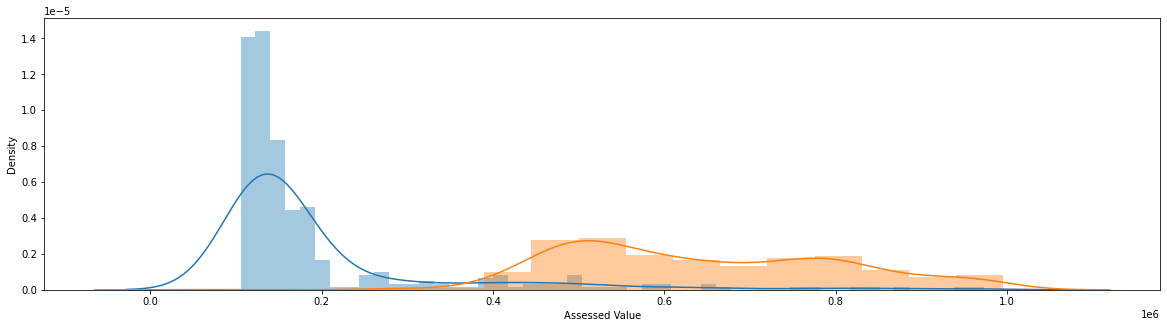

In [35]:
#Plot Glenora's homes - garage vs none.
#Plot Glenora 的家 - 车库 vs 没有。
sns.distplot(dtGlen["Assessed Value"], hist_kws={"label":"Condos"}, kde_kws={"label":"Condo PDF"},)
sns.distplot(glen["Assessed Value"], hist_kws={"label":"Glenora Garage"}, kde_kws={"label":"Glenora Garage PDF"},)
plt.show()
#猜想这里用dtGlen作为condo 就是没车库 是因为选取的是dt glen选取所以区的带车库的在glenora区里

In [36]:
#Take the satistics:
#获取统计数据：
print("Glenora - Mean:", glen["Assessed Value"].mean(), "Median:", glen["Assessed Value"].median(), "STD:", glen["Assessed Value"].std(), "Skew:", thinkstats2.Skewness(df_gar["Assessed Value"]))
print("Non-Gar. Glen - Mean:", dtGlen["Assessed Value"].mean(), "Median:", dtGlen["Assessed Value"].median(), "STD:", dtGlen["Assessed Value"].std(), "Skew:", thinkstats2.Skewness(dtGlen["Assessed Value"]))

Glenora - Mean: 642533.7142857143 Median: 616000.0 STD: 160094.8240731049 Skew: 1.4131815384478883
Non-Gar. Glen - Mean: 195035.51136363635 Median: 141500.0 STD: 144389.9467156847 Skew: 2.9031246230029835


### Final (as of now) Conclusions ### 最终（截至目前）结论

So, where are we? We have a hood where there are a non-trivial numbe不平凡的数字 of garge free homes, where the value of those homes is drastically lower than the overall average price in that hood. We also have a handfull of examples of expensive condos in that hood. We know this area is centrally located.
那么，我们在哪里？我们有一个hood，那里有大量不平凡的数字房屋，这些房屋的价值大大低于该hood的整体平均价格。我们在那个hood里也有一些昂贵的公寓的例子。我们知道这个区域位于市中心。

From external knowledge, glenora is a desireable and wealthy hood overall. 从外部知识来看，glenora 总体上是一个令人向往且富有的hood。

If we are going to look into actual investments, the limited dataset we have here supports us researching Glenora, specifically homes without garages in Glenora as a potential target. We can't be sure that this makes sense without going out anf getting more domain knowledge though - our data didn't have everything - square footage, building age, etc... that we'd need to put cash on the line. 如果我们要研究实际投资，我们这里有限的数据集支持我们研究 Glenora，特别是 Glenora 没有车库的房屋作为潜在目标。但是，如果不出去并获得更多的领域知识，我们无法确定这是否有意义——我们的数据并不包含一切——平方英尺、建筑年龄等……我们需要投入现金。







